# Progetto Visualizzazione Scientifica
### Autori 
Simone Alessandro Casciaro 987303<br>
Michela Francesca Firrera 02022A

### Scaletta
- Introduzione
    - 1 slide su spiegazione di cos'è un GP
    - Chi ha vinto più GP? (Piloti e Costruttori)
    - Distribuzione delle vittorie del miglior pilota (L. Hamilton) e della migliore squadra (Ferrari)
        - Appunto sul dire che Hamilton non ha mai corso in Ferrari
- Com'è strutturato un GP?
    - Slide che mostra il format classico: FP1, FP2, FP3, Q1, Q2, Q3 e R
- Inizio Analisi GP
    - Studio delle FP1
    - Studio delle FP2
    - Studio delle FP3
        ...
- Introduzione format alternativo
    - Slide che mostra il format Sprint: FP1, Q1, Q2, Q3, SQ1, SQ2, SQ3, SR, R
    - Come cambia l'analisi di un GP nei format Sprint?
        ...
- Domande finali
    - Troveremo domande in corso d'opera alla quale rispondere con ulteriori grafici
- Conclusione

### Fonti
- Dataset http://ergast.com/mrd/
- Stile Grafici https://docs.fastf1.dev/plotting.html
- Telemetrie https://docs.fastf1.dev/core.html

### Apertura File

In [1]:
import pandas as pd

points = pd.read_csv('Dataset/constructor_standings.csv')
results = pd.read_csv('Dataset/results.csv')
constructors = pd.read_csv('Dataset/constructors.csv')
drivers = pd.read_csv('Dataset/drivers.csv')
races = pd.read_csv('Dataset/races.csv')
circuits = pd.read_csv('Dataset/circuits.csv')

# Introduzione
### Chi ha vinto più GP in F1?

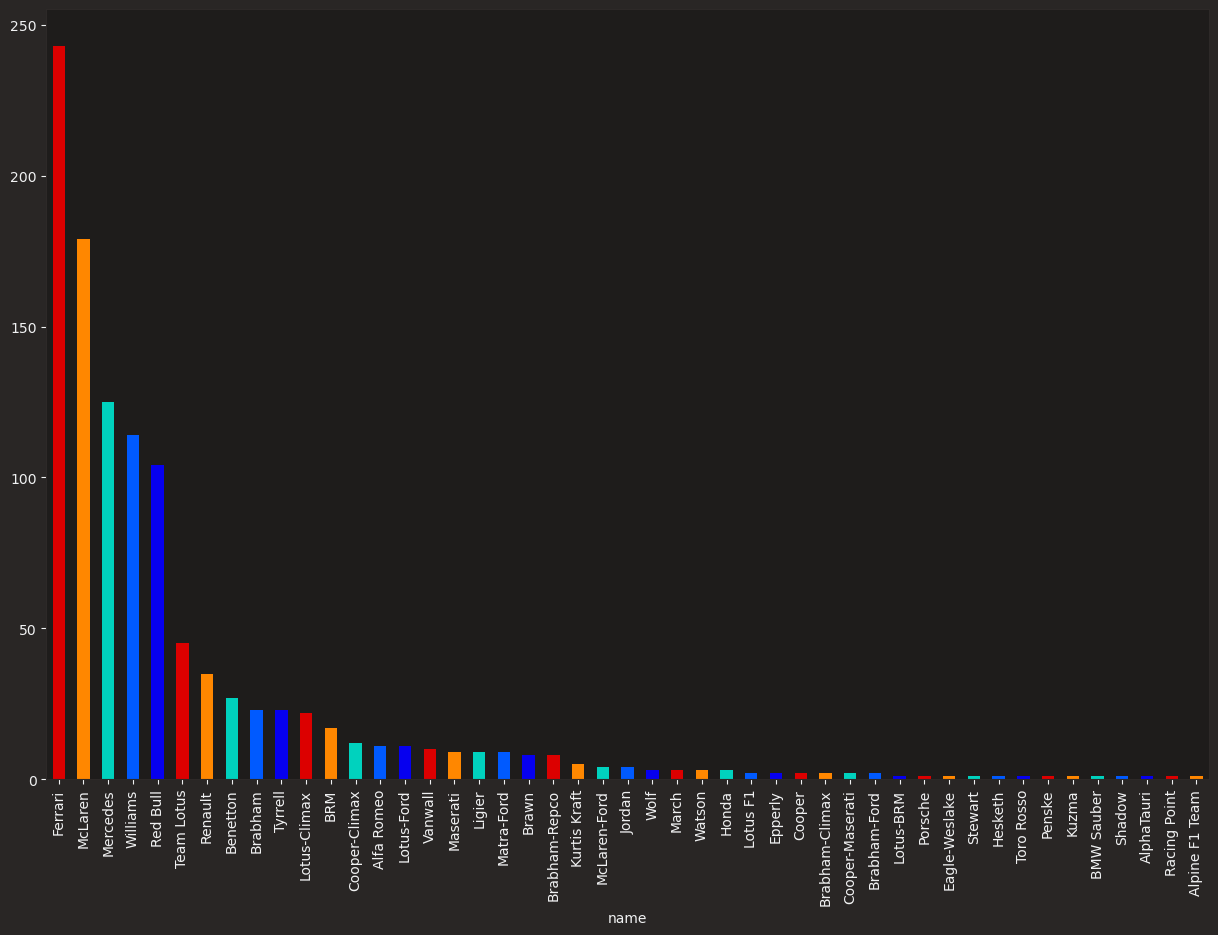

In [2]:
import matplotlib.pyplot as plt
import fastf1.plotting as f1p

f1p.setup_mpl()

plt.rc('figure', figsize=(15.0, 10.0))

c_wins = results[results['positionOrder']==1].merge(constructors, on = 'constructorId')

colorStyle = [
    f1p.team_color('Fer'), # Ferrari
    f1p.team_color('Mcl'), # McLaren
    f1p.team_color('Mer'),
    f1p.team_color('Wil'),
    f1p.team_color('Rbr'),
    # ...
]

c_wins['name'].value_counts().plot.bar(color = colorStyle)
plt.show()

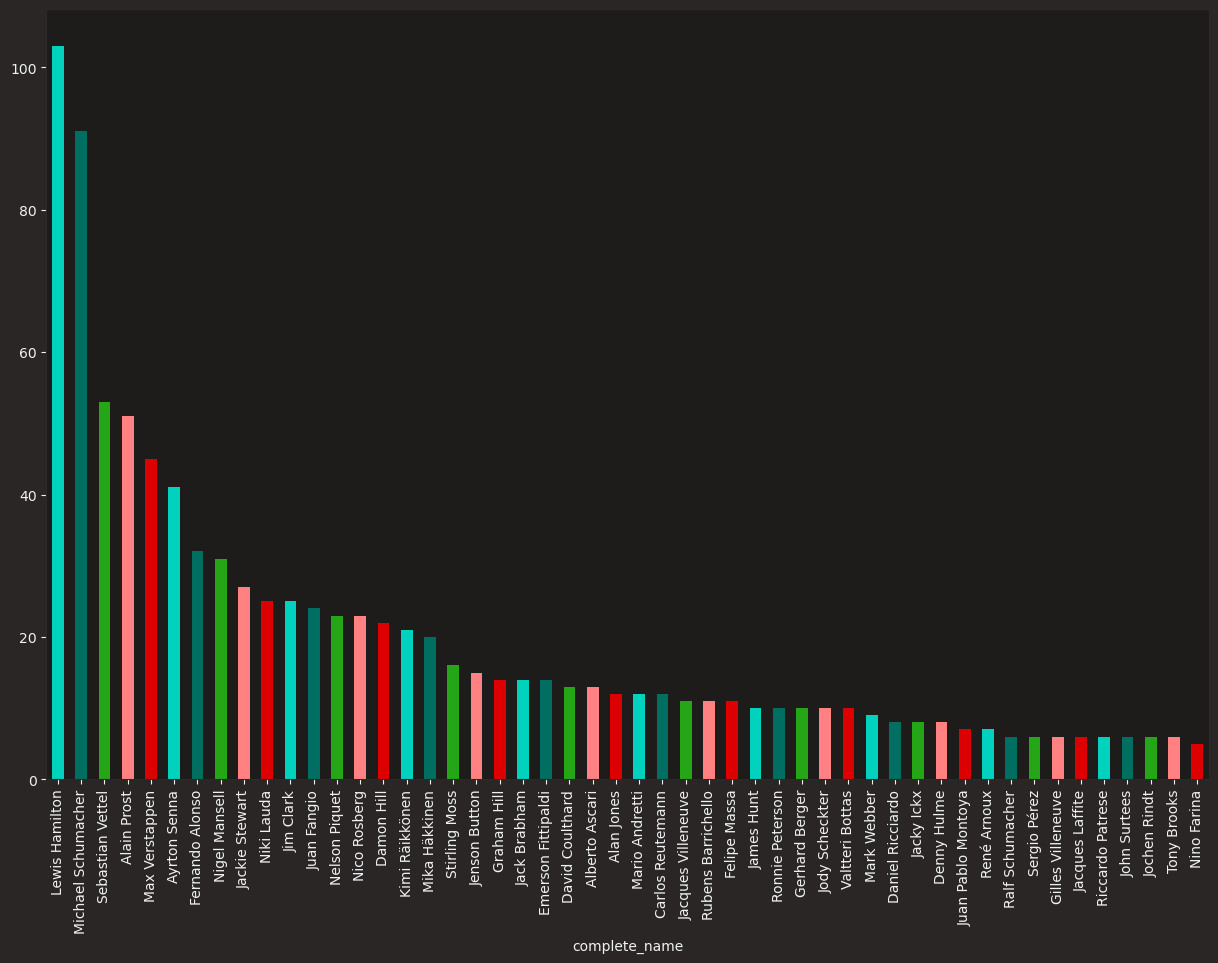

In [3]:
d_wins = results[results['positionOrder']==1].merge(drivers, on = 'driverId')
complete_name = d_wins['forename'] + ' ' + d_wins['surname']
d_wins['complete_name'] = complete_name

colorStyle = [
    f1p.driver_color('Ham'), # 
    f1p.driver_color('Alo'), # 
    f1p.driver_color('Str'),
    f1p.driver_color('Sai'),
    f1p.driver_color('Lec'),
    # ...
]

d_wins['complete_name'].value_counts().head(50).plot.bar(color = colorStyle) # Limit 50 per visualizzazione del grafico
plt.show()

### Grafico a torta dei vincitori

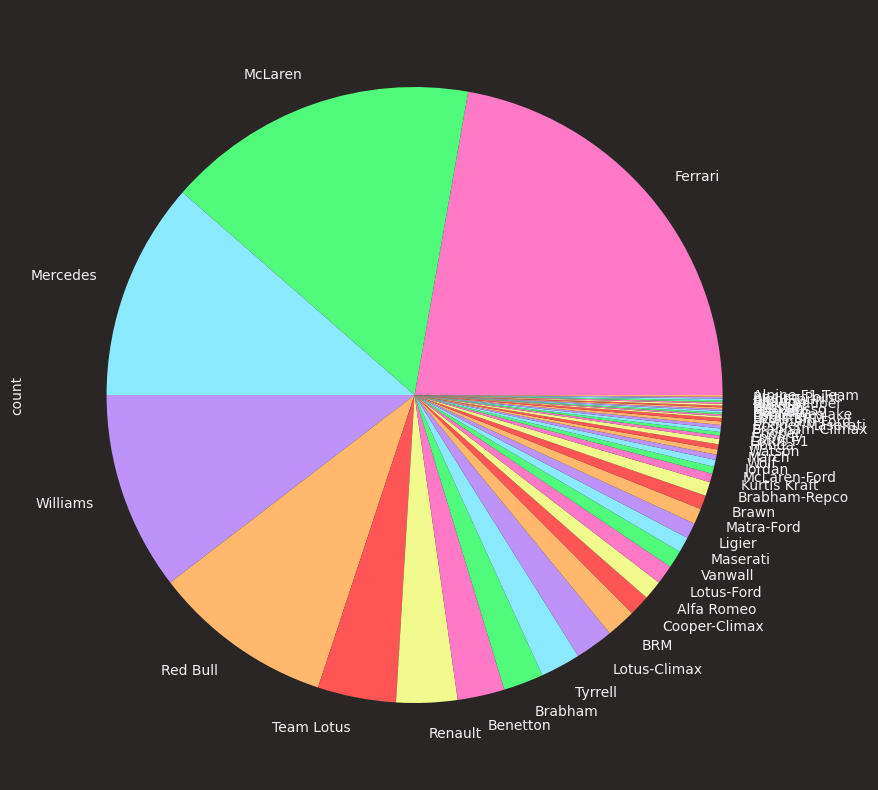

In [10]:
vc = c_wins['name'].value_counts().plot.pie()

### Quando hanno vinto i due più vincenti? (Ferrari e L. Hamilton)